In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install -U scikit-learn==1.0

     |████████████████████████████████| 23.1 MB 1.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/NSCU/ALDA/train.csv")

X = train_df.drop(['target'], axis=1)
y = train_df.target

#train_df.head()
y

0          False
1          False
2          False
3          False
4          False
           ...  
6593269    False
6593270    False
6593271    False
6593272    False
6593273    False
Name: target, Length: 6593274, dtype: bool

In [ ]:
from datetime import datetime

train_df["Ob"] = train_df["Ob"].apply(lambda x: datetime.strptime(x,"%m/%d/%Y %M:%S"))
train_df['year'] = train_df['Ob'].dt.year
train_df['month'] = train_df['Ob'].dt.month
train_df['day'] = train_df['Ob'].dt.day
train_df['minute'] = train_df['Ob'].dt.minute
train_df['seconds'] = train_df['Ob'].dt.second


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


False    6358102
True      235172
Name: target, dtype: int64

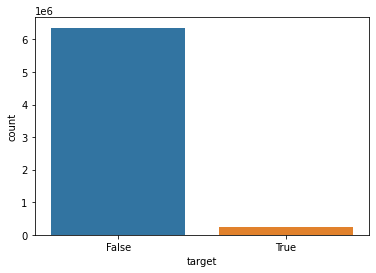

In [ ]:
import seaborn as sns

sns.countplot(train_df['target'])
y.value_counts()

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['Station','Ob','measure','target'], axis=1), y, train_size=0.7, random_state=123)

In [ ]:
bbc = BalancedBaggingClassifier(random_state=0, sampling_strategy='auto', n_estimators=100)

#for x in X_train.columns:
#  print(x)

In [ ]:
bbc.fit(X_train, y_train)

BalancedBaggingClassifier(n_estimators=100, random_state=0)

In [ ]:
y_pred_train = bbc.predict(X_train)
y_pred_test = bbc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Accuracy for training data:')
print(accuracy_score(y_train, y_pred_train))

print('Accuracy for test data:')
print(accuracy_score(y_test, y_pred_test))

print()

print('Confusion matrix for test data:')
print(confusion_matrix(y_test, y_pred_test))

print()

print('Classification report for test data:')
print(classification_report(y_test, y_pred_test))

Accuracy for training data:
0.992943673540845
Accuracy for test data:
0.9921859793537153

Confusion matrix for test data:
[[1892454   14848]
 [    608   70073]]

Classification report for test data:
              precision    recall  f1-score   support

       False       1.00      0.99      1.00   1907302
        True       0.83      0.99      0.90     70681

    accuracy                           0.99   1977983
   macro avg       0.91      0.99      0.95   1977983
weighted avg       0.99      0.99      0.99   1977983



Logistic: f1=0.901 auc=0.991


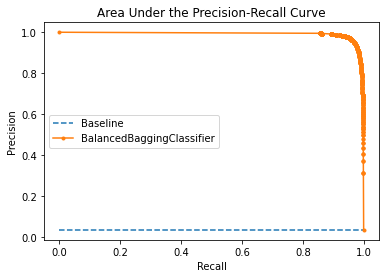

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# predict probabilities
lr_probs = bbc.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred_test), auc(lr_recall, lr_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Baseline')
pyplot.plot(lr_recall, lr_precision, marker='.', label='BalancedBaggingClassifier')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Area Under the Precision-Recall Curve')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Hyperparameter tuning

In [ ]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'n_estimators':[500, 1000]}

# bbc = BalancedBaggingClassifier(random_state=0, sampling_strategy='auto')
# bbc = GridSearchCV(bbc,parameters)

# bbc.fit(X_train, y_train)

# print(bbc.best_estimator_)

In [ ]:
#The above code cell took 13+ hours to run and produce an output, n_estimators = 1000 was concluded as the best estimator 

In [ ]:
bbc = BalancedBaggingClassifier(random_state=0, sampling_strategy='auto', n_estimators=1000)
bbc.fit(X_train, y_train)

BalancedBaggingClassifier(n_estimators=1000, random_state=0)

In [ ]:
y_pred_train = bbc.predict(X_train)
y_pred_test = bbc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Accuracy for training data:')
print(accuracy_score(y_train, y_pred_train))

print('Accuracy for test data:')
print(accuracy_score(y_test, y_pred_test))

print()

print('Confusion matrix for test data:')
print(confusion_matrix(y_test, y_pred_test))

print()

print('Classification report for test data:')
print(classification_report(y_test, y_pred_test))

Accuracy for training data:
0.992850721655471
Accuracy for test data:
0.9920863829466684

Confusion matrix for test data:
[[1892247   15055]
 [    598   70083]]

Classification report for test data:
              precision    recall  f1-score   support

       False       1.00      0.99      1.00   1907302
        True       0.82      0.99      0.90     70681

    accuracy                           0.99   1977983
   macro avg       0.91      0.99      0.95   1977983
weighted avg       0.99      0.99      0.99   1977983



Logistic: f1=0.900 auc=0.993


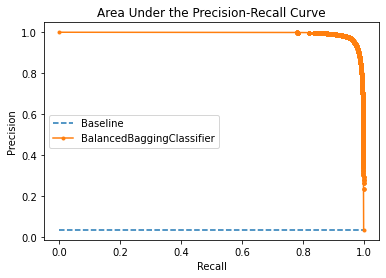

In [ ]:
# predict probabilities
lr_probs = bbc.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred_test), auc(lr_recall, lr_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Baseline')
pyplot.plot(lr_recall, lr_precision, marker='.', label='BalancedBaggingClassifier')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Area Under the Precision-Recall Curve')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()